In [64]:
import sqlite3
con=sqlite3.connect("accident_data_v1.0.0_2023.db")

In [65]:
cur=con.cursor()

In [3]:
import matplotlib.pyplot as plt

In [4]:
import re

In [5]:
import pandas as pd
data = pd.read_sql_query("SELECT* FROM sqlite_master WHERE type='table';", con)
data

,type,name,tbl_name,rootpage,sql
0,table,accident,accident,2,CREATE TABLE accident(accident_index PRIMARY K...
1,table,casualty,casualty,20823,CREATE TABLE casualty(casualty_index PRIMARY K...
2,table,vehicle,vehicle,31657,CREATE TABLE vehicle(vehicle_index PRIMARY KEY...
3,table,lsoa,lsoa,50839,"CREATE TABLE lsoa(objectid PRIMARY KEY, lsoa01..."


In [6]:
accident = pd.read_sql_query("SELECT * FROM accident  WHERE accident_year=2020;", con)
accident

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [197]:
vehicle = pd.read_sql_query("SELECT * FROM vehicle WHERE accident_year=2020;", con)
vehicle

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,0,0,0,0,0,0,4,9,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,0,2,0,0,0,0,1,1,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,0,0,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,0,0,0,0,0,0,1,1,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,9,1,0,0,0,0,1,1,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,0,6,0,0,0,0,3,1,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,0,1,0,0,0,0,1,1,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,0,6,0,0,0,0,3,1,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,4,8,0,0,0,0,1,1,6,1,76,11,-1,-1,-1,-1,9,1


In [8]:
casualty  = pd.read_sql_query("SELECT * FROM casualty WHERE accident_year=2020;", con)
casualty 

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [79]:
lsoa = pd.read_sql_query("SELECT * FROM lsoa;", con)

In [8]:
accident.isna().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


# Data Cleaning

In [173]:
# Identify columns with missing values
columns_with_missing = ['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude']

In [174]:
# Fill missing values with the median
for col in columns_with_missing:
    median_value = accident[col].median()
    accident[col].fillna(median_value, inplace=True)

# Are there significant hours of the day, and days of the week, on which accidents occur?


In [31]:
#Extracting the Days of the Week and plotting it against the accident count
a=accident["day_of_week"].value_counts()

<AxesSubplot:xlabel='Accident Count', ylabel='Day of the Week'>

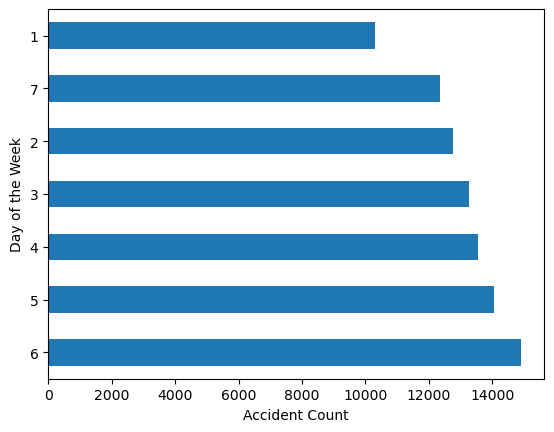

In [87]:
plt.xlabel("Accident Count")
plt.ylabel("Day of the Week")
a.plot.barh()

In [55]:
#Extracting the hours from time in the data frame

data2 = [item.replace(':', '') for item in accident["time"]]
hours = [int(str(value)[:2]) for value in data2]
hours=pd.DataFrame(hours)
value_counts=hours.value_counts(sort=True)

<AxesSubplot:xlabel='Accident Count', ylabel='0'>

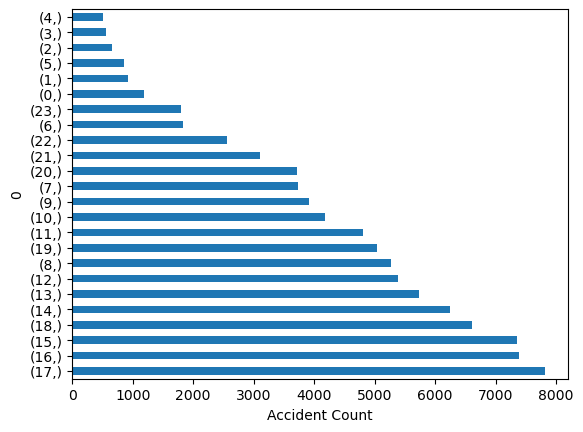

In [88]:
#Plotting Accident count per hours

plt.xlabel("Accident Count")
plt.ylabel("Time of the Day")
value_counts.plot.barh()

# For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

In [9]:
vehicle.isna().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

In [10]:
casualty.isna().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

In [ ]:
#Vehicle Codes for motorcycles
#02. Motorcycle 50cc and under
#03. Motorcycle over 50cc and up to 125cc
#04. Motorcycle over 125cc and up to 500cc
#05. Motorcycle over 500cc
#97. Motorcycle – unknown cc
#23. Electric motorcycle


In [133]:
#Query to extract the data for motorcycles
query = """
SELECT a.time,a.day_of_week, v.vehicle_type
FROM accident AS a
JOIN vehicle AS v ON a. accident_index = v.accident_index
WHERE v.vehicle_type IN (02,03,04,05,97,23) AND a.accident_year=2020
"""
Bike_Data = pd.read_sql_query(query, con)

In [134]:
Bike_Data

,time,day_of_week,vehicle_type
0,03:25,4,3
1,08:00,4,2
2,14:00,4,3
3,14:37,4,3
4,19:05,4,3
...,...,...,...
14692,16:30,5,3
14693,17:30,4,3
14694,17:55,2,3
14695,15:45,5,4


In [135]:
Bike_Data["vehicle_type"].value_counts()

3     7523
5     3784
4     1691
2     1128
97     478
23      93
Name: vehicle_type, dtype: int64

<AxesSubplot:xlabel='Accident Count', ylabel='0'>

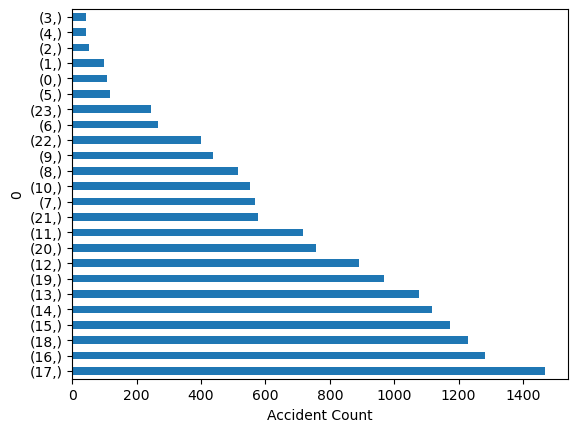

In [136]:
#Extracting the Hour value for bike specific accidents
dataB = [item.replace(':', '') for item in Bike_Data["time"]]
hoursB = [int(str(value)[:2]) for value in dataB]
hoursB=pd.DataFrame(hoursB)
value_countsB=hoursB.value_counts(sort=True)
plt.xlabel("Accident Count")
plt.ylabel("Time of the Day")
value_countsB.plot.barh()

In [137]:
c=Bike_Data["day_of_week"]

<AxesSubplot:xlabel='Accident Count', ylabel='Day of the Week'>

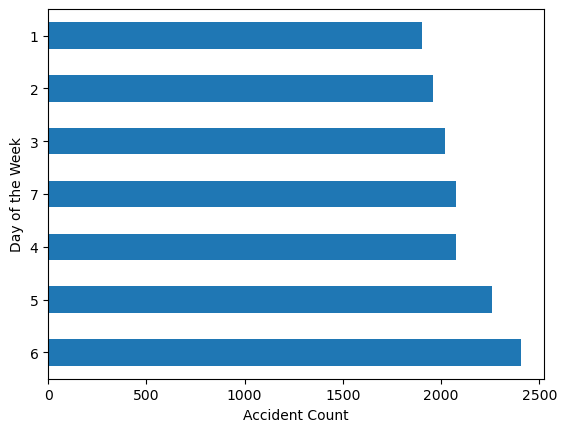

In [138]:
plt.xlabel("Accident Count")
plt.ylabel("Day of the Week")
c.value_counts().plot.barh()

# For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?


In [24]:
casualty.head(5)

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3


In [26]:
casualty["casualty_class"].value_counts()

1    79330
2    21504
3    14750
Name: casualty_class, dtype: int64

In [ ]:
#3 Casualty Class corresponds to pedestrians

In [140]:
query = """
SELECT a.time,a.day_of_week, c.casualty_class
FROM accident AS a
JOIN casualty AS c ON a. accident_index = c.accident_index
WHERE c.casualty_class IS 3 AND a.accident_year=2020
"""
Pedestrian_Casualty_Data = pd.read_sql_query(query, con)

In [141]:
Pedestrian_Casualty_Data

,time,day_of_week,casualty_class
0,09:00,3,3
1,13:55,2,3
2,13:55,2,3
3,01:25,4,3
4,01:50,4,3
...,...,...,...
14745,10:30,3,3
14746,17:00,2,3
14747,12:00,3,3
14748,15:05,6,3


In [142]:
Pedestrian_Casualty_Data["day_of_week"].value_counts()

6    2543
5    2366
3    2267
4    2247
2    2207
7    1878
1    1242
Name: day_of_week, dtype: int64

<AxesSubplot:xlabel='Accident Count', ylabel='Day of the Week'>

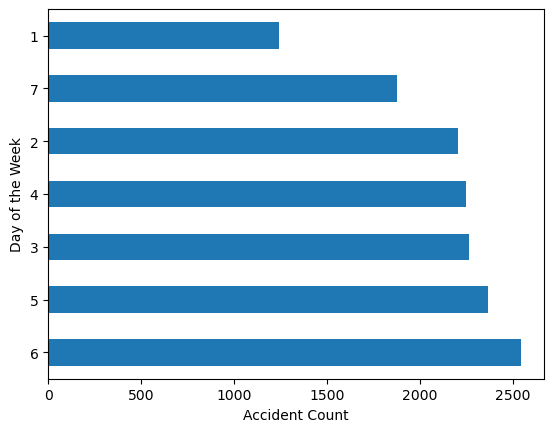

In [143]:
plt.xlabel("Accident Count")
plt.ylabel("Day of the Week")
Pedestrian_Casualty_Data["day_of_week"].value_counts().plot.barh()

<AxesSubplot:xlabel='Accident Count', ylabel='0'>

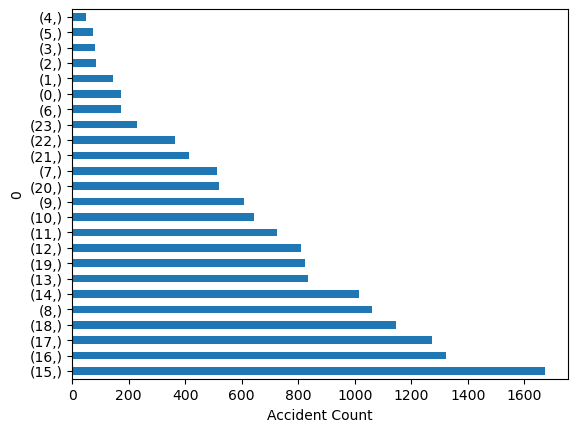

In [144]:
Pedestrian_Casualty_Data = [item.replace(':', '') for item in Pedestrian_Casualty_Data["time"]]
hours = [int(str(value)[:2]) for value in Pedestrian_Casualty_Data]
hours=pd.DataFrame(hours)
value_counts=hours.value_counts(sort=True)
plt.xlabel("Accident Count")
plt.ylabel("Time of the Day")
value_counts.plot.barh()

In [29]:
Pedestrian_Casualty_Data.isna().sum()

time              0
day_of_week       0
casualty_class    0
dtype: int64

# Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region? 


In [147]:
#Extracting the Data for Humberside region
query = """
SELECT *
FROM accident AS a
JOIN casualty AS c ON a.accident_index = c.accident_index
JOIN vehicle AS v ON a. accident_index = v.accident_index
JOIN lsoa AS l ON a.lsoa_of_accident_location = l.lsoa01cd
WHERE a.police_force=16 AND a.accident_year=2020
"""
Hull_data2 = pd.read_sql_query(query, con)

In [163]:
#Extracting the Data for Humberside region
query = """
SELECT * FROM accident
WHERE police_force=16 AND accident_year=2020
"""
Hull_data2 = pd.read_sql_query(query, con)

In [164]:
Hull_data2

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020160914781,2020,160914781,510156.0,429221.0,-0.331047,53.747751,16,2,1,...,0,4,1,1,0,0,1,1,2,E01033109
1,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,5,1,1,1,0,0,1,1,2,E01012777
2,2020160915008,2020,160915008,497660.0,402806.0,-0.528743,53.512895,16,3,1,...,0,4,1,1,0,0,2,1,2,E01013325
3,2020160915028,2020,160915028,510449.0,434112.0,-0.324858,53.791630,16,2,1,...,0,4,1,1,0,0,1,1,2,E01012788
4,2020160915041,2020,160915041,526236.0,410340.0,-0.095008,53.574501,16,3,1,...,0,4,1,1,0,0,1,1,2,E01013220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2020161014491,2020,161014491,489433.0,408637.0,-0.651104,53.566753,16,3,2,...,0,1,1,1,0,0,1,2,2,E01013239
1705,2020161014528,2020,161014528,503756.0,439285.0,-0.424674,53.839482,16,3,2,...,0,4,1,1,0,0,1,2,2,E01013041
1706,2020161014544,2020,161014544,511525.0,433149.0,-0.308880,53.782750,16,3,1,...,0,1,1,1,0,0,1,2,2,E01012907
1707,2020161014546,2020,161014546,485978.0,408912.0,-0.703181,53.569801,16,3,2,...,0,1,1,1,0,1,2,2,1,E01013286


In [148]:
Hull_data

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,generic_make_model,driver_imd_decile,driver_home_area_type,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,HYUNDAI I10,6,3,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff
1,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,VOLKSWAGEN TRANSPORTER,7,1,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff
2,2020160915008,2020,160915008,497660.0,402806.0,-0.528743,53.512895,16,3,1,...,-1,3,1,13325,E01013325,North Lincolnshire 022C,North Lincolnshire 022C,2.922303e+07,35402.961317,7ef78052-d8cd-44b7-83fe-911922ac653e
3,2020160915028,2020,160915028,510449.0,434112.0,-0.324858,53.791630,16,2,1,...,-1,-1,-1,12788,E01012788,Kingston upon Hull 002E,Kingston upon Hull 002E,4.380009e+05,4731.122554,3976daa3-b707-42ec-80fd-cc3ee771e32f
4,2020160915041,2020,160915041,526236.0,410340.0,-0.095008,53.574501,16,3,1,...,CITROEN C2,3,1,13220,E01013220,North East Lincolnshire 003C,North East Lincolnshire 003C,9.608273e+05,7574.743799,3fd9635e-6911-4973-93f9-d797fcda91ae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,2020161014546,2020,161014546,485978.0,408912.0,-0.703181,53.569801,16,3,2,...,RENAULT TRUCKS MODEL MISSING,-1,-1,13286,E01013286,North Lincolnshire 005A,North Lincolnshire 005A,7.579247e+06,13518.945251,f88ba1d4-39d2-404c-bbbb-d6e539bd97ca
3981,2020161014546,2020,161014546,485978.0,408912.0,-0.703181,53.569801,16,3,2,...,-1,-1,-1,13286,E01013286,North Lincolnshire 005A,North Lincolnshire 005A,7.579247e+06,13518.945251,f88ba1d4-39d2-404c-bbbb-d6e539bd97ca
3982,2020161014546,2020,161014546,485978.0,408912.0,-0.703181,53.569801,16,3,2,...,RENAULT TRUCKS MODEL MISSING,-1,-1,13286,E01013286,North Lincolnshire 005A,North Lincolnshire 005A,7.579247e+06,13518.945251,f88ba1d4-39d2-404c-bbbb-d6e539bd97ca
3983,2020161014949,2020,161014949,509443.0,428632.0,-0.342063,53.742609,16,3,2,...,-1,-1,-1,12854,E01012854,Kingston upon Hull 029C,Kingston upon Hull 029C,2.187749e+06,8807.661242,9de97052-73e0-4184-8153-96c1b89e75ae


In [149]:
Hull_data.isna().sum()

accident_index            0
accident_year             0
accident_reference        0
location_easting_osgr     0
location_northing_osgr    0
                         ..
lsoa01nm                  0
lsoa01nmw                 0
shape__area               0
shape__length             0
globalid                  0
Length: 90, dtype: int64

In [82]:
#Extracting Geographical Data for Humberside region

In [150]:
longitude=Hull_data["longitude"]
latitude=Hull_data["latitude"]

In [96]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [97]:
import numpy as np

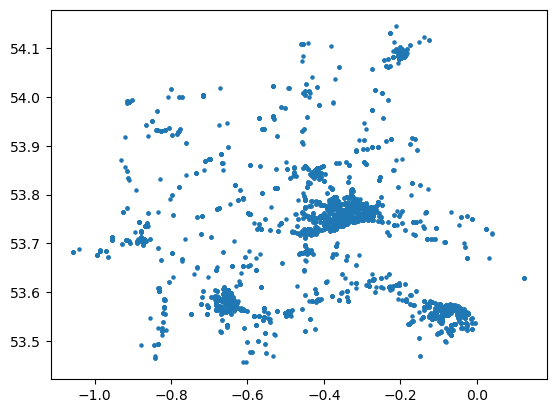

In [151]:
#Plotting the Longitudes and Latitudes to visualize the data
plt.scatter(longitude,latitude,s=5)

# Performing clustering on the humberside region data

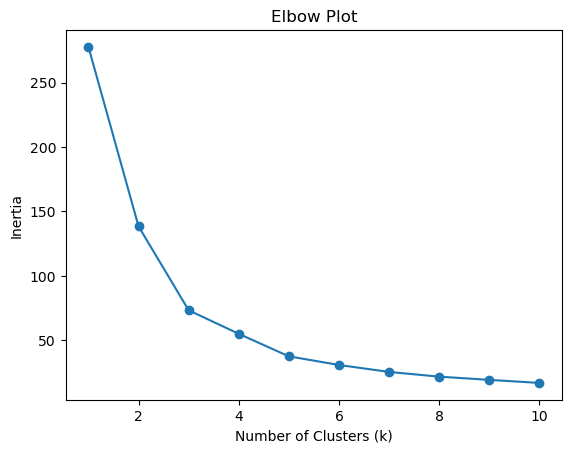

In [152]:
#Using Elbow plot method to find the optimum value of K for KMeans Clustering

data = np.column_stack((longitude, latitude))
inertia = []
k_values = range(1, 11) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

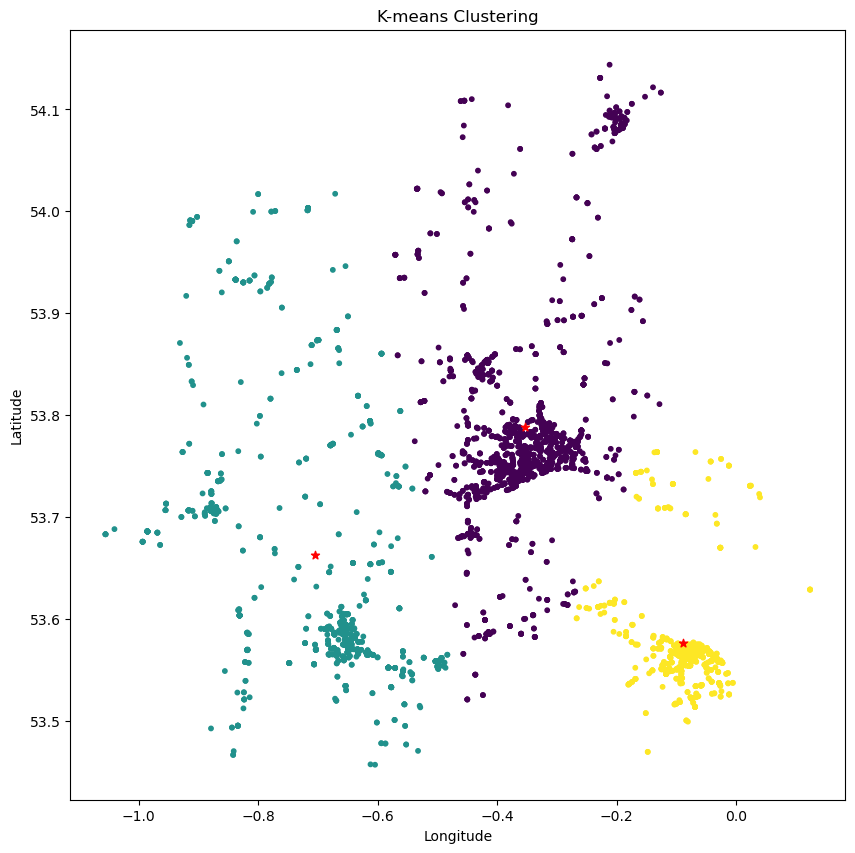

In [154]:
data = np.column_stack((longitude, latitude))
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)


labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 10)) 
plt.scatter(data[:, 0], data[:, 1], c=labels,s=10)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red')
plt.title('K-means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Clustering using DBSCAN

In [156]:
clustering = DBSCAN(eps=10, min_samples=30).fit(data)
DBSCAN_dataset = data.copy()
DBSCAN_dataset=pd.DataFrame(DBSCAN_dataset)
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
0,3985


In [158]:
#Clustering using DBScan
dbscan_opt=DBSCAN(eps=.04,min_samples=50)
dbscan_opt.fit(data)
labels=dbscan_opt.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [159]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 831


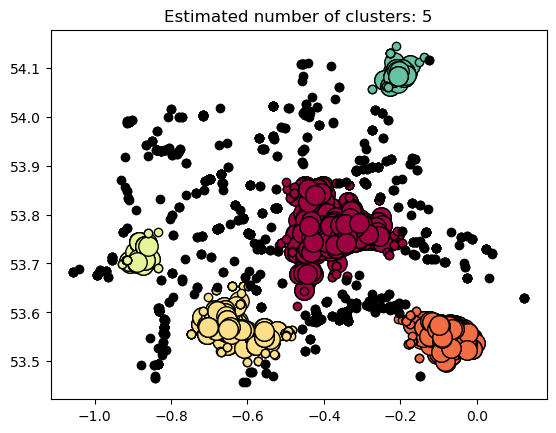

In [160]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan_opt.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

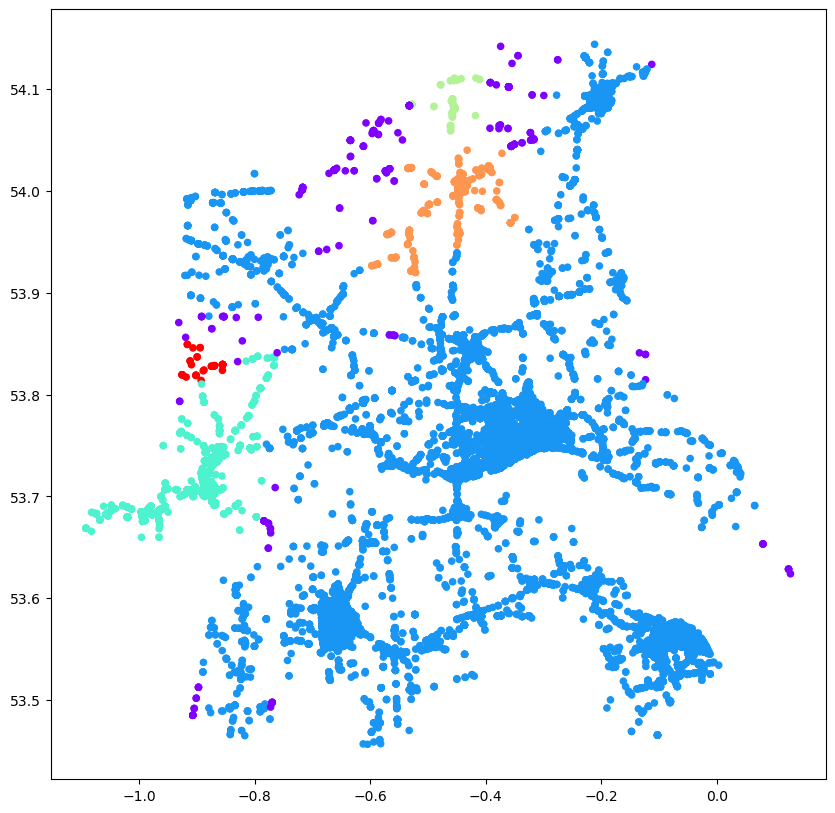

In [91]:
plt.figure(figsize=(10,10))
plt.scatter(data[:, 0], data[:, 1],c=labels,s=20,cmap='rainbow')
plt.show()

# Clustering the data points on google maps

In [161]:
import gmplot
gmap = gmplot.GoogleMapPlotter(53.747049, -0.340565, 12 )
gmap.scatter( latitude, longitude,
                                size = 40, marker = False)
gmap.draw('index4.html')

# Using the apriori algorithm, explore the impact of selected variables on accident severity.  


In [31]:
accident["accident_severity"].value_counts()

3    71453
2    18355
1     1391
Name: accident_severity, dtype: int64

In [53]:
accident["urban_or_rural_area"].value_counts()

1    61737
2    29448
3       14
Name: urban_or_rural_area, dtype: int64

In [41]:
accident["weather_conditions"].value_counts()

1    70730
2    11583
8     2629
9     2423
5     1665
4     1401
7      510
3      185
6       73
Name: weather_conditions, dtype: int64

In [40]:
accident['weather_conditions'].replace(-1, 1,inplace=True)

In [39]:
accident["speed_limit"].value_counts()

30    52272
60    11408
20    11183
40     7867
70     4687
50     3782
Name: speed_limit, dtype: int64

In [38]:
accident['speed_limit'].replace(-1, 30,inplace=True)

In [32]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

In [44]:
a_severity=pd.get_dummies(accident.accident_severity,prefix="accident_severity")
weather=pd.get_dummies(accident.weather_conditions,prefix="weather_severity")
speed_limits=pd.get_dummies(accident.speed_limit,prefix="speed_limit")
concatenated_df = pd.concat([a_severity, weather,speed_limits],axis=1)

In [45]:
concatenated_df

,accident_severity_1,accident_severity_2,accident_severity_3,weather_severity_1,weather_severity_2,weather_severity_3,weather_severity_4,weather_severity_5,weather_severity_6,weather_severity_7,weather_severity_8,weather_severity_9,speed_limit_20,speed_limit_30,speed_limit_40,speed_limit_50,speed_limit_60,speed_limit_70
0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
91195,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
91196,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
91197,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [46]:
results=apriori(concatenated_df,min_support=0.2,use_colnames=True)
results

C:\Users\Usama Arshad\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.201263,(accident_severity_2)
1,0.783484,(accident_severity_3)
2,0.775557,(weather_severity_1)
3,0.573164,(speed_limit_30)
4,0.603186,"(weather_severity_1, accident_severity_3)"
5,0.460082,"(speed_limit_30, accident_severity_3)"
6,0.450213,"(speed_limit_30, weather_severity_1)"
7,0.359763,"(speed_limit_30, weather_severity_1, accident_..."


In [51]:
rules=association_rules(results,metric="lift",min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(weather_severity_1),(accident_severity_3),0.775557,0.783484,0.603186,0.777746,0.992676,-0.004450,0.974182,-0.031826
1,(accident_severity_3),(weather_severity_1),0.783484,0.775557,0.603186,0.769877,0.992676,-0.004450,0.975317,-0.032953
2,(speed_limit_30),(accident_severity_3),0.573164,0.783484,0.460082,0.802705,1.024532,0.011017,1.097421,0.056098
3,(accident_severity_3),(speed_limit_30),0.783484,0.573164,0.460082,0.587225,1.024532,0.011017,1.034065,0.110592
4,(speed_limit_30),(weather_severity_1),0.573164,0.775557,0.450213,0.785487,1.012805,0.005692,1.046294,0.029620
5,(weather_severity_1),(speed_limit_30),0.775557,0.573164,0.450213,0.580503,1.012805,0.005692,1.017495,0.056329
6,"(weather_severity_1, speed_limit_30)",(accident_severity_3),0.450213,0.783484,0.359763,0.799094,1.019923,0.007028,1.077696,0.035530
7,"(accident_severity_3, speed_limit_30)",(weather_severity_1),0.460082,0.775557,0.359763,0.781954,1.008248,0.002943,1.029338,0.015152
8,"(accident_severity_3, weather_severity_1)",(speed_limit_30),0.603186,0.573164,0.359763,0.596437,1.040604,0.014038,1.057668,0.098333
9,(speed_limit_30),"(accident_severity_3, weather_severity_1)",0.573164,0.603186,0.359763,0.627678,1.040604,0.014038,1.065781,0.091416


In [54]:
acc_apriori_data = accident[['accident_severity', 'day_of_week', 'first_road_class', 'road_type', 'speed_limit','junction_detail', 
                                   'junction_control', 'second_road_class', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 
                                   'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards',
                                   'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident']]

 

acc_apriori_data

,accident_severity,day_of_week,first_road_class,road_type,speed_limit,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident
0,3,3,6,6,20,0,-1,0,9,9,1,9,9,0,0,1,3
1,3,2,3,6,20,9,2,6,0,4,1,1,1,0,0,1,1
2,3,4,5,6,30,3,1,6,0,0,4,1,2,0,0,1,1
3,2,4,3,6,30,0,-1,0,0,4,4,1,1,0,0,1,1
4,3,4,3,6,30,3,4,5,0,0,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2,4,4,6,30,1,4,4,0,0,1,1,1,0,0,1,1
91195,3,6,6,9,30,3,4,6,0,0,1,1,1,0,0,1,2
91196,2,4,4,6,60,8,-1,6,0,0,1,1,1,0,0,2,1
91197,3,3,6,6,30,3,4,6,0,0,1,1,1,0,0,1,2


In [55]:
acc_apriori_data = pd.get_dummies(data=acc_apriori_data, columns=['accident_severity', 'day_of_week', 'first_road_class', 'road_type', 'speed_limit','junction_detail', 
                                   'junction_control', 'second_road_class', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 
                                   'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards',
                                   'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident'])
acc_apriori_data

,accident_severity_1,accident_severity_2,accident_severity_3,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,...,carriageway_hazards_6,carriageway_hazards_7,carriageway_hazards_9,urban_or_rural_area_1,urban_or_rural_area_2,urban_or_rural_area_3,did_police_officer_attend_scene_of_accident_-1,did_police_officer_attend_scene_of_accident_1,did_police_officer_attend_scene_of_accident_2,did_police_officer_attend_scene_of_accident_3
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
91195,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
91196,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
91197,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [60]:
results=apriori(acc_apriori_data,min_support=0.8,use_colnames=True)
results

C:\Users\Usama Arshad\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.946918,(pedestrian_crossing_human_control_0)
1,0.957346,(special_conditions_at_site_0)
2,0.963618,(carriageway_hazards_0)
3,0.918804,"(pedestrian_crossing_human_control_0, special_..."
4,0.922762,"(pedestrian_crossing_human_control_0, carriage..."
5,0.935372,"(special_conditions_at_site_0, carriageway_haz..."
6,0.899209,"(pedestrian_crossing_human_control_0, special_..."


In [62]:
results.value_counts()

support   itemsets                                                                                  
0.899209  (pedestrian_crossing_human_control_0, special_conditions_at_site_0, carriageway_hazards_0)    1
0.918804  (pedestrian_crossing_human_control_0, special_conditions_at_site_0)                           1
0.922762  (pedestrian_crossing_human_control_0, carriageway_hazards_0)                                  1
0.935372  (special_conditions_at_site_0, carriageway_hazards_0)                                         1
0.946918  (pedestrian_crossing_human_control_0)                                                         1
0.957346  (special_conditions_at_site_0)                                                                1
0.963618  (carriageway_hazards_0)                                                                       1
dtype: int64

In [168]:
rules=association_rules(results,metric="confidence",min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pedestrian_crossing_human_control_0),(special_conditions_at_site_0),0.946918,0.957346,0.918804,0.970310,1.013541,0.012275,1.436627,0.251693
1,(special_conditions_at_site_0),(pedestrian_crossing_human_control_0),0.957346,0.946918,0.918804,0.959741,1.013541,0.012275,1.318496,0.313225
2,(pedestrian_crossing_human_control_0),(carriageway_hazards_0),0.946918,0.963618,0.922762,0.974490,1.011282,0.010295,1.426180,0.210176
3,(carriageway_hazards_0),(pedestrian_crossing_human_control_0),0.963618,0.946918,0.922762,0.957602,1.011282,0.010295,1.251979,0.306649
4,(special_conditions_at_site_0),(carriageway_hazards_0),0.957346,0.963618,0.935372,0.977047,1.013936,0.012856,1.585067,0.322232
5,(carriageway_hazards_0),(special_conditions_at_site_0),0.963618,0.957346,0.935372,0.970688,1.013936,0.012856,1.455153,0.377783
6,"(pedestrian_crossing_human_control_0, special_...",(carriageway_hazards_0),0.918804,0.963618,0.899209,0.978674,1.015624,0.013833,1.705983,0.189467
7,"(pedestrian_crossing_human_control_0, carriage...",(special_conditions_at_site_0),0.922762,0.957346,0.899209,0.974476,1.017893,0.015807,1.671111,0.227587
8,"(special_conditions_at_site_0, carriageway_haz...",(pedestrian_crossing_human_control_0),0.935372,0.946918,0.899209,0.961339,1.015229,0.013488,1.372995,0.232104
9,(pedestrian_crossing_human_control_0),"(special_conditions_at_site_0, carriageway_haz...",0.946918,0.935372,0.899209,0.949617,1.015229,0.013488,1.282725,0.282590


In [181]:
pd.set_option("max_colwidth", None)
rules[["antecedents", "consequents"]]

,antecedents,consequents
0,(pedestrian_crossing_human_control_0),(special_conditions_at_site_0)
1,(special_conditions_at_site_0),(pedestrian_crossing_human_control_0)
2,(pedestrian_crossing_human_control_0),(carriageway_hazards_0)
3,(carriageway_hazards_0),(pedestrian_crossing_human_control_0)
4,(special_conditions_at_site_0),(carriageway_hazards_0)
5,(carriageway_hazards_0),(special_conditions_at_site_0)
6,"(pedestrian_crossing_human_control_0, special_conditions_at_site_0)",(carriageway_hazards_0)
7,"(pedestrian_crossing_human_control_0, carriageway_hazards_0)",(special_conditions_at_site_0)
8,"(special_conditions_at_site_0, carriageway_hazards_0)",(pedestrian_crossing_human_control_0)
9,(pedestrian_crossing_human_control_0),"(special_conditions_at_site_0, carriageway_hazards_0)"


# Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?

In [183]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17959
           1       0.00      0.00      0.00       278

    accuracy                           0.98     18237
   macro avg       0.49      0.50      0.50     18237
weighted avg       0.97      0.98      0.98     18237



C:\Users\Usama Arshad\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usama Arshad\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usama Arshad\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


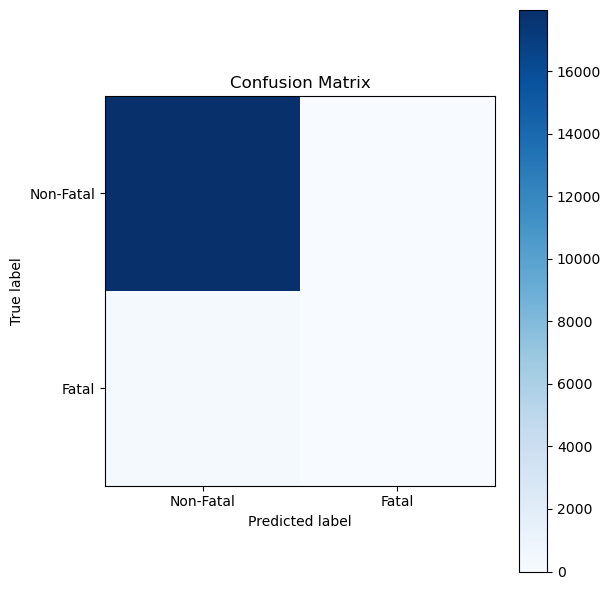

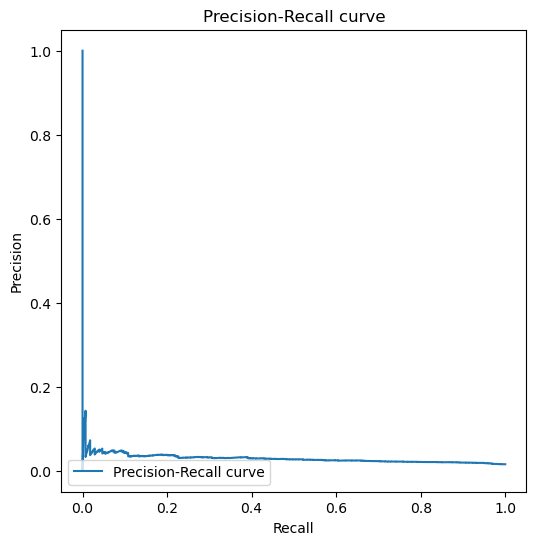

In [185]:

# Connect to the SQLite database
with sqlite3.connect('accident_data_v1.0.0_2023.db') as conn:
    # Load the accident data for the year 2020
    query = "SELECT * FROM accident WHERE accident_year = 2020"
    data = pd.read_sql_query(query, conn)

# Remove records with missing values
data.dropna(inplace=True)

# Convert 'time' to minutes past midnight
data['time'] = data['time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

# Convert accident_severity to binary (1 for fatal accidents, 0 for non-fatal accidents)
data['accident_severity'] = data['accident_severity'].apply(lambda x: 1 if x == 1 else 0)

# Define features and target
X = data.drop('accident_severity', axis=1)
y = data['accident_severity']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Categorical features for encoding
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Build a data preprocessing and model training pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))  # Using Logistic Regression
])

# Train the model
pipeline.fit(X_train, y_train) 

# Predict test set results
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Fatal', 'Fatal'])
plt.yticks(tick_marks, ['Non-Fatal', 'Fatal'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()


# Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data? 


In [186]:
#Using Interquartile range to identify outliers

def IQR(a):
    a=sorted(a)
    q75,q25=np.percentile(a,[75,25])
    iqr=q75-q25
    print(f"IQR is {iqr}")
    q1=q75+1.5*iqr
    q2=q25-1.5*iqr
    print(f"upper quartile + 1.5*IQR is {q1}")
    print(f"lower quartile - 1.5*IQR is {q2}")

In [189]:
IQR(vehicle["age_of_driver"])

IQR is 27.0
upper quartile + 1.5*IQR is 89.5
lower quartile - 1.5*IQR is -18.5


In [190]:
IQR(vehicle["age_of_vehicle"])

IQR is 12.0
upper quartile + 1.5*IQR is 29.0
lower quartile - 1.5*IQR is -19.0


In [191]:
#Checking for range of dataset
vehicle["age_of_driver"].value_counts()

-1      23344
 30      5308
 29      3672
 28      3622
 25      3599
        ...  
 97         3
 98         3
 3          2
 99         2
 100        1
Name: age_of_driver, Length: 99, dtype: int64

In [193]:
#Checking for range of dataset
vehicle["age_of_vehicle"].value_counts()

-1     43072
 1      9310
 4      9260
 5      8746
 3      8512
       ...  
 66        1
 84        1
 92        1
 62        1
 93        1
Name: age_of_vehicle, Length: 75, dtype: int64

In [198]:
#Replacing -1 values by Mean
vehicle["age_of_driver"].replace(-1,vehicle["age_of_driver"].mean(),inplace=True)

In [199]:
IQR(vehicle["age_of_driver"])

IQR is 20.0
upper quartile + 1.5*IQR is 79.0
lower quartile - 1.5*IQR is -1.0


In [201]:
#Dropping Outliers
vehicle = vehicle.drop(vehicle[(vehicle.age_of_driver > 79) | (vehicle.age_of_driver < 0) ].index)

In [202]:
vehicle["age_of_driver"].value_counts()

34.509658    23344
30.000000     5308
29.000000     3672
28.000000     3622
25.000000     3599
             ...  
7.000000        46
6.000000        39
5.000000        22
4.000000        10
3.000000         2
Name: age_of_driver, Length: 78, dtype: int64

In [203]:
vehicle["age_of_vehicle"].replace(-1,vehicle["age_of_vehicle"].mean(),inplace=True)
IQR(vehicle["age_of_vehicle"])

IQR is 6.0
upper quartile + 1.5*IQR is 20.0
lower quartile - 1.5*IQR is -4.0


In [204]:
#Dropping Outliers
vehicle = vehicle.drop(vehicle[(vehicle.age_of_vehicle > 20) | (vehicle.age_of_vehicle < 0) ].index)

In [205]:
vehicle["age_of_vehicle"].value_counts()

5.782737     42745
1.000000      9186
4.000000      9114
5.000000      8598
3.000000      8370
2.000000      8280
6.000000      7687
7.000000      6998
13.000000     6587
8.000000      6430
12.000000     6146
10.000000     6094
9.000000      6033
11.000000     5826
14.000000     5579
15.000000     4659
0.000000      3957
16.000000     3696
17.000000     2841
18.000000     2050
19.000000     1220
20.000000      733
Name: age_of_vehicle, dtype: int64

# Deploying Grubb's Test

In [206]:
import scipy.stats as stats
avg=np.mean(vehicle["age_of_driver"])
avg2=np.mean(vehicle["age_of_vehicle"])
absvalues=abs(vehicle["age_of_driver"]-avg)
absvalues2=abs(vehicle["age_of_vehicle"]-avg)
maxvalue=max(absvalues)
maxvalue2=max(absvalues2)
stdev=np.std(vehicle["age_of_driver"])
stdev2=np.std(vehicle["age_of_vehicle"])

In [207]:
Grubbs=maxvalue/stdev
Grubbs

2.834699365420287

In [208]:
Grubbs2=maxvalue2/stdev2
Grubbs2

8.585312664874703

In [209]:
vehicle.iloc[67465]

vehicle_index                              750414
accident_index                      2020140995640
accident_year                                2020
accident_reference                      140995640
vehicle_reference                               3
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          1
vehicle_direction_to                            5
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       2
sex_of_driver                                   1
